In [1]:
import sklearn 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


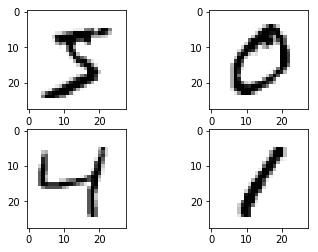

In [2]:
import gzip, pickle, sys 
f = gzip.open('../Datasets/mnist.pkl.gz', 'rb')
(input_train, output_train), (input_test, output_test), _ = pickle.load(f, encoding='bytes')

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(input_train[i].reshape((28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()



In [3]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=30)

randomforest.fit(input_train,output_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [4]:

from sklearn.metrics import classification_report
print(classification_report(output_test, randomforest.predict(input_test)))

from sklearn.decomposition import PCA

pca = PCA(n_components=500)
pca.fit(input_train)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       991
           1       0.99      0.99      0.99      1064
           2       0.96      0.97      0.97       990
           3       0.96      0.97      0.97      1030
           4       0.97      0.97      0.97       983
           5       0.96      0.95      0.96       915
           6       0.98      0.99      0.98       967
           7       0.97      0.97      0.97      1090
           8       0.96      0.95      0.95      1009
           9       0.95      0.94      0.95       961

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



PCA(copy=True, iterated_power='auto', n_components=500, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

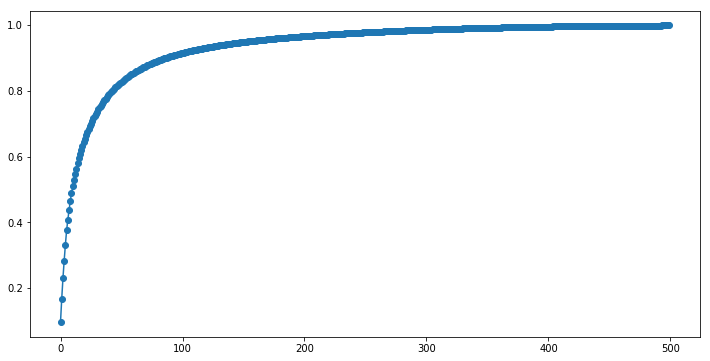

In [5]:
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_[0:500]),marker = 'o')
plt.show()

In [11]:
np.cumsum(pca.explained_variance_ratio_[0:500])[100]

0.91565186

In [7]:
pca = PCA(n_components= 200)
pca.fit(input_train)

x_train = pca.transform(input_train)
x_test = pca.transform(input_test)



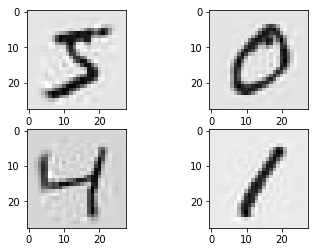

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [8]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(pca.inverse_transform(x_train)[i].reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest' )
plt.show()

randomforest = RandomForestClassifier(n_estimators=30)

randomforest.fit(x_train,output_train)


In [12]:
from sklearn.metrics import classification_report

In [13]:
print(classification_report(output_test, randomforest.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       991
           1       0.97      0.98      0.98      1064
           2       0.92      0.94      0.93       990
           3       0.90      0.93      0.91      1030
           4       0.92      0.94      0.93       983
           5       0.93      0.89      0.91       915
           6       0.96      0.97      0.97       967
           7       0.95      0.95      0.95      1090
           8       0.94      0.89      0.91      1009
           9       0.92      0.90      0.91       961

   micro avg       0.94      0.94      0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [14]:
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE